# Fase 1: Limpieza de datos

El objetivo de esta etapa es generar un dataset listo para la fase de EDA (Analisis Exploratorio de los Datos).
Se han llevado a cabo las siguientes tareas:
- Selección de las columnas relevantes para el estudio
- Búsqueda y eliminación de filas duplicadas
- Uniformización del texto de los registros de la variable `name` y la variable `model`
- Recuperación de valores desconocidos y perdidos de las variables `brand` y `model`
- Transformación y creación de nuevas variables `postalZone` y `cubic_centimeters` respectivamente
- Eliminación de registros con datos manifiestamente erróneos o extremos
- Exportación del dataset resultante de la limpieza

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from unicodedata import normalize

import ancillary_funcs as aux
from ancillary_data import diccionario_marcas_modelos

import warnings
warnings.simplefilter('ignore')

## Lectura y primera mirada al dataset

El dataset `autos.csv` es una colección de datos sobre autos usados compuesta por 371528 filas donde cada una representa un anuncio de venta de un auto. Cada anuncio contiene información (21 columnas) acerca de las características del auto, el precio, el vendedor, etc.

Estas columnas son:
- `dateCrawled`: fecha en la que se rastreó el coche (fecha)
- `name`: Nombre del coche. Incluye detalles que pueden ser de interés como la mecánica del motor (TDI, DCi, CDI, etc) o la cilindrada (1.0, 1.6, etc.) (texto)
- `seller`: Tipo de vendedor (categórica: privat/particular o gewerblich/concesionario)
- `offerType`: Tipo de oferta (categórica: angebot/oferta o gesuch/demanda)
- `price`: Precio del coche (numérica)
- `abtest`: Tipo de prueba (categórica: test o control)
- `vehicleType`: tipo de vehículo (categórica: limousine/sedán, kleinwagen/coche pequeño, kombi/camioneta, bus/autobús, cabrio/convertible, coupe, suv, andere/otro)
- `yearOfRegistration`: año en que se registró el automóvil. (numérica)
- `gearbox`: Tipo de caja de cambios (categórica: manuell/manual o automatik/automática)
- `powerPS`: Potencia del coche en PS (numérica)
- `model`: Modelo del coche (categórica)
- `kilometer`: Kilómetros que ha recorrido el coche (numérica)
- `monthOfRegistration`: Mes en que se registró el automóvil (numérica)
- `fuelType`: Tipo de combustible (categórica: benzin/gasolina, diesel/diésel, lpg/glp, cng/gnp, hybrid/híbrido, andere/otro, elektro/electrico)
- `brand`: Marca del coche (categórica)
- `notRepairedDamage`: si el automóvil tiene o no algún daño que no haya sido reparado (categórica: nein/no o ja/si)
- `dateCreated`: fecha en que se creó la alerta del el coche (fecha)
- `nrOfPictures`: Número de fotografías del coche (numérica)
- `postalCode`: Código postal del coche (categórica)
- `lastSeen`: fecha en la que se vio el coche por última vez (fecha)

In [2]:
# Cargamos los datos como un dataframe de pandas
df_original = pd.read_csv('autos.csv')

In [3]:
df_original.shape

(371528, 21)

In [4]:
df_original.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

## Limpieza de datos
En este punto se realiza una primera limpieza de datos que permita el posterior trabajo con el dataset. 

### Datos faltantes

In [6]:
# Conteo general de los datos faltantes
df_original.isna().sum().sum()

184008

Observamos una cantidad importante de datos nulos que nos conduce a descartar su tratamiento en esta etapa puesto que consideramos que se requiere de un análisis más detallado de las variables que los contienen. Igualmente en esta etapa trataremos de rescatar los máximos registros posibles utilizando la información contenida en el propio dataset.

### Columnas irrelevantes
En este punto vamos a eliminar todas aquellas columnas que consideramos irrelevantes o con escasa capacidad explicativa desde el punto de vista de nuestro objetivo.

In [7]:
# Solicitamos mediante esta función el número de clases de cada variable categórica para eliminar aquellas que tengan menos de dos
aux.conteo_categorias(df_original.select_dtypes(object))

,variable,valores/categorías
2,seller,2
3,offerType,2
4,abtest,2
6,gearbox,2
10,notRepairedDamage,2
8,fuelType,7
5,vehicleType,8
9,brand,40
11,dateCreated,114
7,model,251


In [8]:
# Examinamos las desviaciones estándar de las variables numéricas para eliminar aquellas que tengan un valor de 0
df_original.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [9]:
# Eliminamos las columnas con 0 variabilidad así como las que no son relevantes para el estudio
df = df_original.drop(columns=['index', 'dateCrawled', 'abtest', 'monthOfRegistration', 'dateCreated', 'nrOfPictures', 'lastSeen'])

In [10]:
# Analizamos la variabilidad en los atributos restantes para eliminar aquellas que no sean relevantes
for col in df.select_dtypes(object):
    print(f"Nombre de la variable: {col}")
    print(df[col].value_counts())
    print('-'*100)

Nombre de la variable: name
Ford_Fiesta                                              657
BMW_318i                                                 627
Opel_Corsa                                               622
Volkswagen_Golf_1.4                                      603
BMW_316i                                                 523
                                                        ... 
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON      1
Renault_clio_in_gold_450VB_!!                              1
Fiat_Doblo_1.6_Multijet                                    1
Renault_Laguna_1                                           1
BMW_M135i_vollausgestattet_NP_52.720____Euro               1
Name: name, Length: 233531, dtype: int64
----------------------------------------------------------------------------------------------------
Nombre de la variable: seller
privat        371525
gewerblich         3
Name: seller, dtype: int64
------------------------------------------------------------

In [11]:
# Eliminamos las columnas con excasa variabilidad
df.drop(columns=['seller', 'offerType'], inplace=True)

Las columnas irrelevantes o con escasa capacidad explicativa eliminadas son las siguientes:

- **Índices**: `index`
- **Columnas que no contienen información relevante para el problema que queremos resolver**: `dateCrawled`, `abtest`, `monthOfRegistration`, `dateCreated`, `nrOfPictures`, `lastSeen`
- **Columnas categóricas con una sola clase**: no hay 
- **Columnas numéricas con un solo valor**: `nrOfPictures`
- **Columnas con más de un valor/categoría pero con escasa variabilidad**: `seller`, `offerType`
- **Columnas con información redundante**: no hay

In [12]:
# Comprobamos los resultados
before_drop = df_original.shape[1]
after_drop = df.shape[1]
print(f'Columnas eliminadas: {before_drop - after_drop}')

Columnas eliminadas: 9


### Filas duplicadas
Analizaremos la existencia de filas duplicadas para proceder a su eliminación

In [13]:
# Consultamos el porcentaje de filas duplicadas
df.duplicated().value_counts('%')

False    0.980521
True     0.019479
dtype: float64

Cerca de un 2% de las filas del dataset están duplicadas.

In [14]:
# Vistazo general a las filas duplicadas
df[df.duplicated()].head(10)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
5277,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115
7794,A3_2.0_TDI_S_line_Sportpaket_Panorama_Navi,16000,limousine,2014,automatik,150,a3,20000,diesel,audi,nein,10115
8364,Skoda_Fabia_1_4_Mpi,1590,kleinwagen,2000,manuell,68,fabia,150000,benzin,skoda,nein,51702
8995,Passat_Variant_2.0_TDI_BlueMotion_Technology_H...,10000,kombi,2013,manuell,140,passat,40000,diesel,volkswagen,nein,10115
9241,MONDEO_2_0TDCI_Leder_Beige_NAVI_Panorama,1700,limousine,2004,manuell,0,mondeo,150000,diesel,ford,NaN,53520
9498,A6_2.0_TDI_DPF_Garantie_Start_Stop_Navi,13000,limousine,2011,manuell,177,a6,80000,diesel,audi,nein,10115
10153,Verkaufe_Benz_180_C_Kombi_Tuev_08/2017,950,kombi,1999,manuell,0,c_klasse,150000,benzin,mercedes_benz,NaN,37154
10250,520_d_Aut._Navi_Prof._Schiebedach__HUD_1_Hand,12800,limousine,2011,automatik,184,5er,125000,diesel,bmw,nein,10115
10474,A4_Diesel_Leder_Top___NAVI,2400,limousine,2003,manuell,0,a4,150000,diesel,audi,NaN,40210
10638,Passat_2.0TDI_Navi_Leder_Top,2600,limousine,2005,manuell,0,passat,150000,diesel,volkswagen,NaN,40210


In [15]:
# Examinamos en detalle uno de los vehículos con registros duplicados
df[(df['postalCode'] == 10115) & (df['brand'] == 'opel')& (df['model'] == 'vivaro')].head(10)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
4691,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115
5277,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115
20511,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115
20653,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115
26673,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115
41529,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115
90997,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115
96118,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115
105714,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115
119119,Vivaro_2.0_CDTI_Life_Westfalia_Klima_7_Sitzer_...,8000,bus,2012,manuell,114,vivaro,100000,diesel,opel,nein,10115


In [16]:
# Eliminamos filas duplicadas y comprobamos resultados
before_drop = df.shape[0]
df.drop_duplicates(inplace=True)
after_drop = df.shape[0]
print(f'Registros duplicados eliminados: {before_drop - after_drop}')

Registros duplicados eliminados: 7237


### Uniformización de las string de la variable 'name'
Parte de los datos que aparecen como perdidos o que están clasificados como 'andere' (otro) son recuperables a partir de la columna 'name' que contiene elementos de gran relevancia como la marca, el modelo, la versión o la capacidad del motor (centímetros cúbicos). Por este motivo vamos a tratar de uniformizar el las string de esta columna convirtiendo todo el texto en minúsculas y eliminando las tíldes u otros caracteres.

#### Uniformización del texto en minúsculas

In [17]:
# Transformamos los caracteres de la variable name en minúsculas
df['name'] = df['name'].str.lower()

In [18]:
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
0,golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,70435
1,a5_sportback_2.7_tdi,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja,66954
2,"jeep_grand_cherokee_""overland""",9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN,90480
3,golf_4_1_4__3türer,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,91074
4,skoda_fabia_1.4_tdi_pd_classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,60437


#### Uniformización del texto eliminando tildes y otros caracteres especiales

In [19]:
for rowname, rowseries in df.iterrows():
    tmp_str = rowseries['name']
    tmp_str = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", tmp_str), 0, re.I
    )
    
    tmp_str = normalize( 'NFC', tmp_str)
    df.loc[rowname, 'name'] = tmp_str
    

### Uniformización de los valores de la variable 'model'

In [20]:
# Comprobamos el número de modelos en el dataset
len(df['model'].value_counts())

251

In [21]:
# Comprobamos el número de marcas en el dataset
len(df['brand'].value_counts())

40

Tenemos 251 modelos agrupados en 40 marcas. Ahora debemos comprobar que no existan errores tipográficos que hagan que Python detecte como clases diferentes clases que son equivalentes o cualquier otro tipo de errores.

In [22]:
for i in df['brand'].unique():
    print(i)
    print(df.loc[(df['brand'] == i)]['model'].unique())
    print('')

volkswagen
['golf' 'andere' 'passat' 'polo' 'scirocco' 'transporter' 'jetta' nan
 'eos' 'touran' 'lupo' 'caddy' 'tiguan' 'sharan' 'up' 'fox' 'beetle'
 'touareg' 'kaefer' 'phaeton' 'cc' 'bora' 'amarok']

audi
[nan 'a8' 'a4' 'a1' 'tt' 'a6' '80' '100' 'a3' 'a2' 'a5' 'andere' 'q5' '90'
 'q3' 'q7' '200']

jeep
['grand' 'wrangler' 'cherokee' 'andere' nan]

skoda
['fabia' 'yeti' 'octavia' 'roomster' 'andere' nan 'superb' 'citigo']

bmw
['3er' '5er' '1er' 'andere' '7er' 'z_reihe' nan '6er' 'x_reihe' 'm_reihe'
 'i3']

peugeot
['2_reihe' '3_reihe' nan 'andere' '4_reihe' '1_reihe' '5_reihe']

ford
['c_max' 'ka' 'fiesta' 'escort' 'focus' 'mustang' 'mondeo' 's_max'
 'galaxy' 'andere' 'transit' 'kuga' nan 'fusion' 'b_max']

mazda
['3_reihe' 'andere' '6_reihe' '5_reihe' 'rx_reihe' '1_reihe' 'mx_reihe'
 nan 'cx_reihe']

nissan
['navara' 'micra' 'almera' 'andere' 'primera' 'juke' 'qashqai' nan
 'x_trail' 'note']

renault
['twingo' 'clio' 'kangoo' 'scenic' nan 'megane' 'r19' 'espace' 'modus'
 'andere' '

Observamos que existen problemas con la marcas Rover y Land Rover. Resulta que los modelos que aparecen como Rover que no son 'andere' (otros) o tipo 'nan' pertenecen, en realidad, a la marca Land Rover

In [23]:
# Buscamos los autos de la marca Land Rover que se habían catalogado erroneamente como Rover
df.loc[(df['brand'] == 'rover') & np.logical_or.reduce((df['model'] == 'discovery', df['model'] == 'rangerover', df['model'] == 'freelander', df['model'] == 'defender'))]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
5083,mgf_cabrio__scottisch_green,3100,cabrio,1999,manuell,120,discovery,150000,benzin,rover,nein,47623
29272,rang_rover_einwandfrei!!_nur_1199,1050,kleinwagen,1998,manuell,103,rangerover,150000,benzin,rover,NaN,49084
106744,land_rover___range_rover_sport_tdv6__erste_hand,23500,suv,2008,automatik,190,rangerover,150000,diesel,rover,nein,23554
114102,land_rover_freelander,2800,suv,1999,manuell,0,freelander,150000,diesel,rover,NaN,17279
123181,range_rover_sport,16900,andere,2007,automatik,190,rangerover,150000,diesel,rover,nein,67549
166610,range_rover_v_8_hse_dunkelgruen_metallic,21800,suv,2010,automatik,272,rangerover,150000,diesel,rover,nein,20251
177941,range_rover,2500,suv,1996,manuell,0,rangerover,150000,diesel,rover,nein,16552
178040,land_rover_freelander_v6,1950,suv,2000,automatik,177,freelander,150000,benzin,rover,nein,83278
179245,land_rover_discovery_hse_voll._tv_dvd_fb_leder...,28900,suv,2007,automatik,190,discovery,50000,diesel,rover,nein,9619
232110,land_rover_freelander,0,suv,1999,manuell,101,freelander,150000,NaN,rover,NaN,26215


In [24]:
# Cambiamos la marca de los autos clasificados erróneamente
df.loc[(df['brand'] == 'rover') & np.logical_or.reduce((df['model'] == 'discovery', df['model'] == 'rangerover', df['model'] == 'freelander', df['model'] == 'defender')),'brand'] = 'land_rover'

In [25]:
# Comprobamos que ya no existen modelos de Land Rover clasificados como Rover
df.loc[(df['brand'] == 'rover')]['model'].value_counts(dropna=False)

andere    388
NaN        80
Name: model, dtype: int64

##########################################################################

In [26]:
# Comprobamos que existe un error tipográfico que clasifica como modelos diferentes range_rover y rangerover
df.loc[(df['brand'] == 'land_rover')]['model'].value_counts()

freelander            222
defender              138
discovery             102
range_rover_sport      99
range_rover            94
range_rover_evoque     65
andere                 21
serie_2                 8
rangerover              6
serie_3                 4
serie_1                 2
discovery_sport         1
Name: model, dtype: int64

In [27]:
# Corregimos
df['model'] = df['model'].replace(['rangerover'], ['range_rover'])

In [28]:
# Comprobamos cambios
df.loc[(df['brand'] == 'land_rover')]['model'].value_counts()

freelander            222
defender              138
discovery             102
range_rover           100
range_rover_sport      99
range_rover_evoque     65
andere                 21
serie_2                 8
serie_3                 4
serie_1                 2
discovery_sport         1
Name: model, dtype: int64

## Rescatando datos perdidos o desconocidos

### Variable 'brand' (marca): 'sonstige_autos' (otros coches)
En el caso de los autos registrados como marca 'sonstige_autos' (otros coches) tenemos 3982 filas de diferentes marcas de las que tampoco hay registro del modelo. Podemos tratar de recuperar los nombres reales de sus marcas. Para ello vamos a obtener a través de ChatGPT una lista en formato array de Python con todos los nombres de marcas de autos que la aplicación sea capaz de extraer, para este caso 104 marcas. Después de algunos descartes nos quedamos con 102.

In [29]:
# Almacenamos las marcas que ya existían
marcas_existentes = df['brand'].unique()
len(marcas_existentes)

40

In [30]:
# Conocemos el número de resgistros pertenecientes a "otros coches"
n_otros_coches = df.loc[(df['brand'] == 'sonstige_autos')].shape[0]
n_otros_coches

3933

In [31]:
# Comprobamos como la variable 'name' contiene en muchos casos la marca del auto
df.loc[(df['brand'] == 'sonstige_autos')].head(10)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
60,tausche_bmw_e38_740i_g._suv_/_gelandewagen_les...,1,suv,1994,manuell,286,NaN,150000,NaN,sonstige_autos,NaN,53721
318,tauache_90ccm_roller_gegen_auto,200,NaN,2009,NaN,0,NaN,10000,NaN,sonstige_autos,NaN,6493
376,corvette_z06,49500,cabrio,2013,NaN,0,NaN,10000,benzin,sonstige_autos,nein,79774
446,microcar_mc1,3950,kleinwagen,2004,automatik,5,NaN,70000,diesel,sonstige_autos,nein,90562
678,oldsmobile_cutlass,15000,coupe,1971,NaN,0,NaN,5000,NaN,sonstige_autos,nein,51145
690,dodge_ram_1500_slt_5_9l_v8_4x4_benzin_/_gas,9900,suv,2000,automatik,250,NaN,150000,lpg,sonstige_autos,nein,17309
729,dodge_avenger_2.7_sxt,6999,limousine,2010,automatik,186,NaN,125000,benzin,sonstige_autos,nein,81929
1030,brilliance_bs4_1.6_comfort,500,limousine,2010,manuell,101,NaN,70000,benzin,sonstige_autos,ja,76829
1044,barkas_b1000__1__viertakt_motor,3900,kombi,1990,manuell,0,NaN,30000,benzin,sonstige_autos,NaN,15345
1148,dodge_ram_b300_mowag_mowag_dodge_v8_selten_neu...,11500,bus,1985,automatik,160,NaN,125000,benzin,sonstige_autos,NaN,4849


In [32]:
# Lista de marcas de autos procedente de ChatGPT
car_brands = ["abarth", "acura", "alfa_romeo", "alpine", "amc", "ariel", "aston_martin", "audi", "bajaj", "bentley", "bmw", "bugatti", "buick", "byd", "cadillac", "caterham", "changan", "chery", "chevrolet", "chrysler", "citroen", "dacia", "daewoo", "daihatsu", "datsun", "de_tomaso", "dodge", "faw", "ferrari", "fiat", "fisker", "ford", "foton", "geely", "genesis", "gmc", "great_wall", "haval", "holden", "honda", "hyundai", "infiniti", "isuzu", "iveco", "jac", "jaguar", "jeep", "jmc", "kia", "koenigsegg", "ktm", "lada", "lamborghini", "lancia", "land_rover", "lexus", "ligier", "lincoln", "lotus", "mahindra", "maruti", "maserati", "mazda", "mclaren", "mercedes_benz", "mg", "mini", "mitsubishi", "morgan", "moskvitch", "nissan", "oldsmobile", "opel", "pagani", "peugeot", "polestar", "pontiac", "porsche", "proton", "renault", "rolls_royce", "rover", "saab", "saic", "seat", "skoda", "smart", "ssangyong", "subaru", "suzuki", "tata", "tesla", "toyota", "triumph", "tv_r", "uaz", "vauxhall", "volkswagen", "volvo", "wiesmann", "zaz", "zotye"]
len(car_brands)

102

In [33]:
# Añadimos el nombre de la marca a partir del conenido del string de la variable 'name'
for rowname, rowseries in df.loc[(df['brand'] == 'sonstige_autos')].iterrows():
    for brand in car_brands:
        if brand in rowseries['name']:
            df.loc[rowname, 'brand'] = brand

In [34]:
# Comprobamos el número de registros que siguen clasificados como "otros coches"
n_otros_coches_no_recuperados = df.loc[(df['brand'] == 'sonstige_autos')].shape[0]


In [35]:
# Almacenamos las marcas agregadas junto a las que ya teníamos
marcas_actualizadas = df['brand'].unique()
len(marcas_actualizadas)

76

In [36]:
# Descubrimos que marcas nuevas se han agregado
list(set(marcas_actualizadas) - set(marcas_existentes))

['proton',
 'ligier',
 'ferrari',
 'lexus',
 'amc',
 'alpine',
 'gmc',
 'caterham',
 'triumph',
 'rolls_royce',
 'ktm',
 'oldsmobile',
 'uaz',
 'maserati',
 'bugatti',
 'wiesmann',
 'bentley',
 'isuzu',
 'ssangyong',
 'pontiac',
 'iveco',
 'buick',
 'mclaren',
 'tata',
 'infiniti',
 'cadillac',
 'aston_martin',
 'mahindra',
 'morgan',
 'lincoln',
 'tesla',
 'mg',
 'lamborghini',
 'lotus',
 'dodge',
 'abarth']

In [37]:
# Número de marcas nuevas agregadas
len(list(set(marcas_actualizadas) - set(marcas_existentes)))

36

In [38]:
# Número de registros de los que se recuperó la marca
n_otros_coches - n_otros_coches_no_recuperados

1998

- Hemos conseguido recuperar más de la mitad (1998) de los registros que estaban clasificados como 'otros autos' (3982). 
- De esta manera añadimos 36 marcas nuevas al dataset además de los registros que se suman a las marcas que ya teníamos.
- El problema con todas las marcas añadidas es que sus modelos aparecen como datos perdidos, lo que se suma a todos los autos que tienen su modelo registrado como 'andere' (otro)

### Recuperando el nombre de los modelos: variable 'model'
Observamos que prácticamente todas las marcas tienen modelos registrados como 'andere' (otros) o como valores perdidos. 

En el caso de la marca Rover donde hicimos correcciones o de todas las marcas que hemos recuperado los modelos se encuentran en esta situación. Vamos a intentar rescatar el nombre de los modelos a partir de los datos en la variable 'name'. Para ello vamos a utilizar un diccionario construido con la ayuda de ChatGPT donde cada clave es una marca y los valores son sus modelos.

El problema con el rescate de los nombres es que hay modelos que son más complicados. Normalmente el dataset agrupa los autos de una misma categoría en un mismo modelo. Por ejemplo todos los autos de la gama 100 de Peugeot aparecen como '1_reihe' (serie 1). Sin embargo, no podemos utilizar el número 1 en solitario para rescatar el modelo porque generaría muchos datos erróneos.  Debemos extraer los modelos concretos (106, 107, etc) y después unificarlos como '1_reihe' para evitar el aumento desproporcionado de la dimensionalidad. Este es el caso también de la marca BMW, donde diferentes modelos componen una serie.

In [39]:
# Número de registros que tienen en la variable 'model' como andere (otro)
len(df.loc[(df['model'] == 'andere')])

26038

In [40]:
# Número de registros que tienen en la variable 'model' como dato perdido NaN
df.isna().sum().get('model')

20286

In [41]:
# Total de registros de los que desconocemos el modelo
len(df.loc[(df['model'] == 'andere')]) + df.isna().sum().get('model')

46324

In [42]:
# Transformamos todos los datos nulos de la variable 'model' en 'andere' (otro) para facilitar el trabajo
df['model'] = df['model'].fillna('andere')

In [43]:
# Comprobamos que la transformación se hizo correctamente
df['model'].value_counts()

andere             46324
golf               29470
3er                20254
polo               12918
corsa              12346
                   ...  
serie_2                8
kalina                 8
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 250, dtype: int64

In [44]:
# Añadimos el nombre del modelo a partir del conenido del string de la variable 'name' y el diccionario de marcas y  modelos
for rowname, rowseries in df.loc[(df['model'] == 'andere')].iterrows():
    for brand, models in diccionario_marcas_modelos.items():
        if brand == rowseries['brand']:
            for model in models:
                if model in rowseries['name']:
                    df.loc[rowname, 'model'] = model

In [45]:
df['model'].value_counts()

golf      30822
andere    26646
3er       20254
polo      13587
corsa     12897
          ...  
s_600         1
exige         1
mgc           1
ats           1
130i          1
Name: model, Length: 505, dtype: int64

- Hemos pasado de 46884 registros de los que no conocíamos los modelos a 26963, lo cual quiere decir que hemos recuperado 19921 registros.
- Ahora debemos corregir y simplificar las categorías

In [46]:
# Visualizamos como han quedado los modelos de las marcas después de la operación anterior
for i in df['brand'].unique():
    print(i)
    print(df.loc[(df['brand'] == i)]['model'].unique())
    print('')

volkswagen
['golf' 'andere' 'passat' 'polo' 'scirocco' 'transporter' 'jetta' 'caddy'
 'eos' 'touran' 'up' 'lupo' 'tiguan' 'sharan' 'fox' 'beetle' 'touareg'
 'kaefer' 'phaeton' 'cc' 'bora' 'amarok']

audi
['a5' 'a8' 'a4' 'a1' 'tt' 'a6' '80' '100' 'a3' 'a2' 'andere' 'q5' '90'
 'q3' 'q7' '200']

jeep
['grand' 'wrangler' 'cherokee' 'andere' 'compass' 'renegade']

skoda
['fabia' 'yeti' 'octavia' 'roomster' 'rapid' 'andere' 'superb' 'citigo']

bmw
['3er' '5er' '1er' '435i' '740i' '7er' 'z_reihe' 'andere' '6er' 'x_reihe'
 'm_reihe' '116i' '520i' '320i' '325i' '220i' '850i' '316i' '318i' '218i'
 '523i' 'm3' 'm4' 'x5' '528i' '328i' 'm5' 'x1' 'm235i' 'z3' 'x3' 'm135i'
 '118i' '420i' '428i' 'i3' '335i' '730i' '650i' '535i' '225i' '135i' 'z4'
 '750i' 'x5_m' 'm6' 'i8' '550i' '130i']

peugeot
['2_reihe' '3_reihe' '107' '206' '806' 'expert' '4_reihe' '1_reihe'
 'partner' '208' '106' '5_reihe' '607' '807' '406' '307' 'andere' '308'
 '207' 'boxer' '407' '306' '205' '108' '605' '405' '508']

ford
['c_ma

Observamos que las siguientes marcas necesitan que se corrijan y unifiquen sus modelos por series: BMW, Peugeot, Mazda, Mercedes Benz, Honda, Hyunday y Volvo.

In [47]:
# BMW
df['model'] = df['model'].replace(['320i', '325i', '316i', '318i', '328i', '335i'], '3er')
df['model'] = df['model'].replace(['116i', '118i', '135i', '130i'], '1er')
df['model'] = df['model'].replace(['520i', '523i', '528i', '535i', '550i'], '5er')
df['model'] = df['model'].replace(['x5', 'x1', 'x3'], 'x_reihe')
df['model'] = df['model'].replace(['740i', '730i', '750i'], '7er')
df['model'] = df['model'].replace(['z3', 'z4'], 'z_reihe')
df['model'] = df['model'].replace(['m3', 'm4', 'm5', 'm235i', 'm135i', 'x5_m', 'm6'], 'm_reihe')
df['model'] = df['model'].replace('650i', '6er')
df['model'] = df['model'].replace(['435i', '420i', '428i'], '4er')
df['model'] = df['model'].replace(['218i', '220i', '225i'], '2er')
df['model'] = df['model'].replace('850i', '8er')
df['model'] = df['model'].replace(['i3', 'i8'], 'i_reihe')

In [48]:
# Peugeot
df['model'] = df['model'].replace(['205', '206', '207', '208'], '2_reihe')
df['model'] = df['model'].replace(['305', '307', '306', '308'], '3_reihe')
df['model'] = df['model'].replace(['105', '107', '106', '108'], '1_reihe')
df['model'] = df['model'].replace(['405', '407', '406', '408'], '4_reihe')
df['model'] = df['model'].replace(['505', '507', '506', '508'], '5_reihe')
df['model'] = df['model'].replace(['805', '807', '806', '808'], '8_reihe')
df['model'] = df['model'].replace(['605', '607', '606', '608'], '6_reihe')


In [49]:
# Mazda
df['model'] = df['model'].replace('mazda3', '3_reihe')
df['model'] = df['model'].replace('mazda6', '6_reihe')
df['model'] = df['model'].replace('mx', 'mx_reihe')
df['model'] = df['model'].replace('rx', 'rx_reihe')

In [50]:
# Mercedes Benz
df['model'] = df['model'].replace(['g_230', 'g_240', 'g_250', 'g_270', 'g_280', 'g_290', 'g_300', 'g_320', 'g_350', 'g_400', 'g_500', 'g_55_amg', 'g_63_amg', 'g_65_amg'], 'g_klasse')
df['model'] = df['model'].replace(['s_250', 's_280', 's_300', 's_320', 's_350', 's_400', 's_420', 's_430', 's_500', 's_550', 's_600', 's_63_amg', 's_65_amg'], 's_klasse')
df['model'] = df['model'].replace(['e_200', 'e_220', 'e_230', 'e_240', 'e_250', 'e_260', 'e_270', 'e_280', 'e_300', 'e_320', 'e_350', 'e_400', 'e_500', 'e_550', 'e_63_amg'], 'e_klasse')
df['model'] = df['model'].replace(['c_180', 'c_200', 'c_220', 'c_230', 'c_240', 'c_250', 'c_280', 'c_300', 'c_350', 'c_400', 'c_450', 'c_63_amg'], 'c_klasse')
df['model'] = df['model'].replace(['b_150', 'b_160', 'b_170', 'b_180', 'b_200', 'b_220', 'b_250'], 'b_klasse')
df['model'] = df['model'].replace(['a_140', 'a_160', 'a_170', 'a_180', 'a_200', 'a_220', 'a_250', 'a_45_amg'], 'a_klasse')

In [51]:
# Honda
df['model'] = df['model'].replace('cr', 'cr_reihe')
df['model'] = df['model'].replace('hr', 'hr_reihe')

In [52]:
# Hyundai
df['model'] = df['model'].replace(['i10', 'i20', 'i30', 'i_30', 'i_20', 'i40', 'i_10'], 'i_reihe')
df['model'] = df['model'].replace('lantra', 'elantra')

In [53]:
# Volvo
df['model'] = df['model'].replace(['v40', 'v70', 'v50', 'v60'], 'v_reihe')
df['model'] = df['model'].replace(['s40', 's70', 's50', 's60', 's80', 's90'], 's_reihe')
df['model'] = df['model'].replace(['c30', 'c70'], 'c_reihe')
df['model'] = df['model'].replace('xc', 'xc_reihe')
df['model'] = df['model'].replace(['940', '945'], '9_reihe')
df['model'] = df['model'].replace(['240', '240'], '2_reihe')
df['model'] = df['model'].replace(['440', '460', '480'], '2_reihe')

## Transformación y creación de nuevas variables
Atendiendo la columna `name` del dataset observamos que es posible extraer de la misma, en algunos casos, la cilindrada del vehículo y el tipo de mecánica de su motor.

In [54]:
# Conteo del número de códigos postales en el set de datos
len(df['postalCode'].unique())

8150

### Capacidad del motor (cilindrada o centímetros cúbicos)
En cuanto a la **cilindrada**, se trata de una característica muy relevante que va muy ligada al tamaño y categoría del auto y, previsiblemente, a su precio. Además, puede ser un dato más representativo incluso que el modelo del auto puesto que un mismo modelo se fabrica en diferentes versiones con distintas cilindradas.


Vamos a extraer los datos de los litros de capacidad del motor de la variable name para generar una nueva variable correspondiente a las cilidradas. Aprovechamos para ello que este dato suele aparecer junto al nombre del auto en forma de decimal (por ejemplo, 1.2 equivaldría a 1.200 centímetros cúbicos). El problema con esto es que marcas de gran peso en el dataset como BMW o Mercedes Benz no incluyen en el nombre del auto su cilindrada. Más adelante tendremos que lidiar con esto, decidiendo si imputar los valores para estas marcas, conseguir los datos o prescindir de la variable.

In [55]:
# Comprobamos a grandes rasgos si aparece el dato de los centimetros cúbicos en la variable name para la marca Mercedes Benz
df.loc[(df['brand'] == 'mercedes_benz')].sample(5)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
275412,mercedes_e200_automatik,1990,limousine,1998,automatik,136,e_klasse,150000,benzin,mercedes_benz,NaN,82024
161282,mercedes_benz_a_160_l,3500,limousine,2004,manuell,102,a_klasse,125000,benzin,mercedes_benz,nein,84381
322031,mercedes_benz_c_180_t_avantgarde_edition_c,22800,kombi,2013,automatik,156,c_klasse,50000,benzin,mercedes_benz,nein,90409
279342,mercedes_benz_a170_avantgarde,7200,kleinwagen,2008,manuell,116,a_klasse,80000,benzin,mercedes_benz,nein,35614
113533,ml_270_cdi___leder___navi_comando_7_sitze,3550,suv,2002,automatik,190,m_klasse,150000,diesel,mercedes_benz,nein,46395


In [56]:
# Comprobamos a grandes rasgos si aparece el dato de los centimetros cúbicos en la variable name para la marca BMW
df.loc[(df['brand'] == 'bmw')].sample(5)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
292259,bmw_530d_e61_tausch,0,kombi,2005,manuell,218,5er,150000,diesel,bmw,nein,71254
5198,bmw_316ti_compact,2150,limousine,2002,manuell,116,3er,150000,benzin,bmw,nein,65520
5224,bmw_316_i_motor_schaden,1200,limousine,2004,manuell,0,3er,150000,benzin,bmw,NaN,50827
79485,bmw_325i_aut.,9850,limousine,2005,automatik,218,3er,150000,benzin,bmw,nein,28309
306887,bmw__318_kombi,950,kombi,2001,manuell,118,3er,150000,benzin,bmw,NaN,27321


In [57]:
# Comprobamos a grandes rasgos si aparece el dato de los centimetros cúbicos en la variable name para la marca Volkswagen
df.loc[(df['brand'] == 'volkswagen')].sample(5)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
136373,volkswagen_golf_1.6_trendline,5000,limousine,2005,manuell,102,golf,150000,benzin,volkswagen,nein,33129
248351,volkswagen_polo_6n,500,kleinwagen,1999,manuell,60,polo,150000,benzin,volkswagen,ja,97450
34167,vw_caddy_life_1_6__7_sitz__klimaautomatik_ahk_...,6950,bus,2009,manuell,102,caddy,125000,benzin,volkswagen,nein,38173
155834,sparsames_auto_mit_75ps___100km_8l_verbrauch,1500,kombi,1999,manuell,75,polo,150000,benzin,volkswagen,nein,60326
145209,vw_polo_kleinwagen,1200,kleinwagen,1999,manuell,50,polo,80000,NaN,volkswagen,NaN,99097


In [58]:
# Rellenamos una nueva columna con los datos de los centímetros cúbicos extraidos de la columna name
for rowname, rowseries in df.iterrows():
    tmp_str = rowseries['name']
    if '.' in tmp_str:
        index_point = tmp_str.index('.')
        tmp_substring = tmp_str[index_point-1:index_point+2]
        df.loc[rowname, 'cubic_centimeters'] = tmp_substring
    else:
        df.loc[rowname, 'cubic_centimeters'] = np.nan

In [59]:
# Nos aseguramos que todos los datos extraídos son convertibles a datos tipo float
for rowname, rowseries in df.iterrows():
    try:
        df.loc[rowname, 'cubic_centimeters'] = float(df.loc[rowname, 'cubic_centimeters'])
    
    except ValueError:
        df.loc[rowname, 'cubic_centimeters'] = np.nan


In [60]:
# Convertimos la columna entera a tipo float
df['cubic_centimeters'] = df['cubic_centimeters'].astype(float)

In [61]:
# Comprobamos los resultados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364291 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name                364291 non-null  object 
 1   price               364291 non-null  int64  
 2   vehicleType         326893 non-null  object 
 3   yearOfRegistration  364291 non-null  int64  
 4   gearbox             344607 non-null  object 
 5   powerPS             364291 non-null  int64  
 6   model               364291 non-null  object 
 7   kilometer           364291 non-null  int64  
 8   fuelType            331225 non-null  object 
 9   brand               364291 non-null  object 
 10  notRepairedDamage   293759 non-null  object 
 11  postalCode          364291 non-null  int64  
 12  cubic_centimeters   136942 non-null  float64
dtypes: float64(1), int64(5), object(7)
memory usage: 47.0+ MB


### Código postal
El **código postal** no tiene una relación directa con el precio del vehículo, sin embargo, puede pasar que determinadas zonas geográficas estén más asociadas a vehículos de mayor valor que otras o que existan sesgos en la base de datos. El problema es que en esta variable tenemos 8150 códigos postales diferentes. Vamos a agruparlos atendiendo al funcionamiento del sistema de códigos postales en Alemania. Según este sistema, la primera cifra de cada código determina la zona geográfica del país al que pertenece.


<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/German_postcode_information.png/480px-German_postcode_information.png" width="300" align="left"/>
<div>
    

Mapa postal de Alemania. Fuente: Wikipedia

In [62]:
# Creamos una nueva columna que agrupará los códigos postales por zona postal y lo guardamos como variable categórica
df.loc[:,'postalZone'] = 0
df.loc[(df['postalCode']>=0) & (df['postalCode']<10000),'postalZone'] = "0"
df.loc[(df['postalCode']>=10000) & (df['postalCode']<20000),'postalZone'] = "1"
df.loc[(df['postalCode']>=20000) & (df['postalCode']<30000),'postalZone'] = "2"
df.loc[(df['postalCode']>=30000) & (df['postalCode']<40000),'postalZone'] = "3"
df.loc[(df['postalCode']>=40000) & (df['postalCode']<50000),'postalZone'] = "4"
df.loc[(df['postalCode']>=50000) & (df['postalCode']<60000),'postalZone'] = "5"
df.loc[(df['postalCode']>=60000) & (df['postalCode']<70000),'postalZone'] = "6"
df.loc[(df['postalCode']>=70000) & (df['postalCode']<80000),'postalZone'] = "7"
df.loc[(df['postalCode']>=80000) & (df['postalCode']<90000),'postalZone'] = "8"
df.loc[(df['postalCode']>=90000) & (df['postalCode']<100000),'postalZone'] = "9"

In [63]:
# Eliminamos la columa postalCode
df.drop(columns='postalCode', inplace=True)

In [64]:
# Comprobamos resultados
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,cubic_centimeters,postalZone
0,golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,1.6,7
1,a5_sportback_2.7_tdi,18300,coupe,2011,manuell,190,a5,125000,diesel,audi,ja,2.7,6
2,"jeep_grand_cherokee_""overland""",9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN,NaN,9
3,golf_4_1_4__3turer,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,NaN,9
4,skoda_fabia_1.4_tdi_pd_classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,1.4,6


### Tipo de mecánica del motor
El **tipo de mecánica** también es un dato interesante pero pensamos que no es tan relevante. Normalmente un tipo de mecánica es utilizada por un mismo grupo automovilistico. Por ejemplo, el grupo Volkswagen al que pertenecen marcas como la propia Volkswagen, Seat, Skoda o Audi entre otras; utiliza en sus autos la tecnología TDI (Turbo Direct Injection). Este hecho nos conduce a pensar que una supuesta variable de tipo de mecánica estaría estrechamente relacionada con la marca del auto y, por lo tanto, descartamos por el momento su creación.

## Eliminación de outliers (valores atípicos)
Vamos a eliminar aquellos outliers de las columnas numéricas que, debido a su valor, sepamos con seguridad que son incorrectos o que no tengan relación con los objetivos del estudio. 

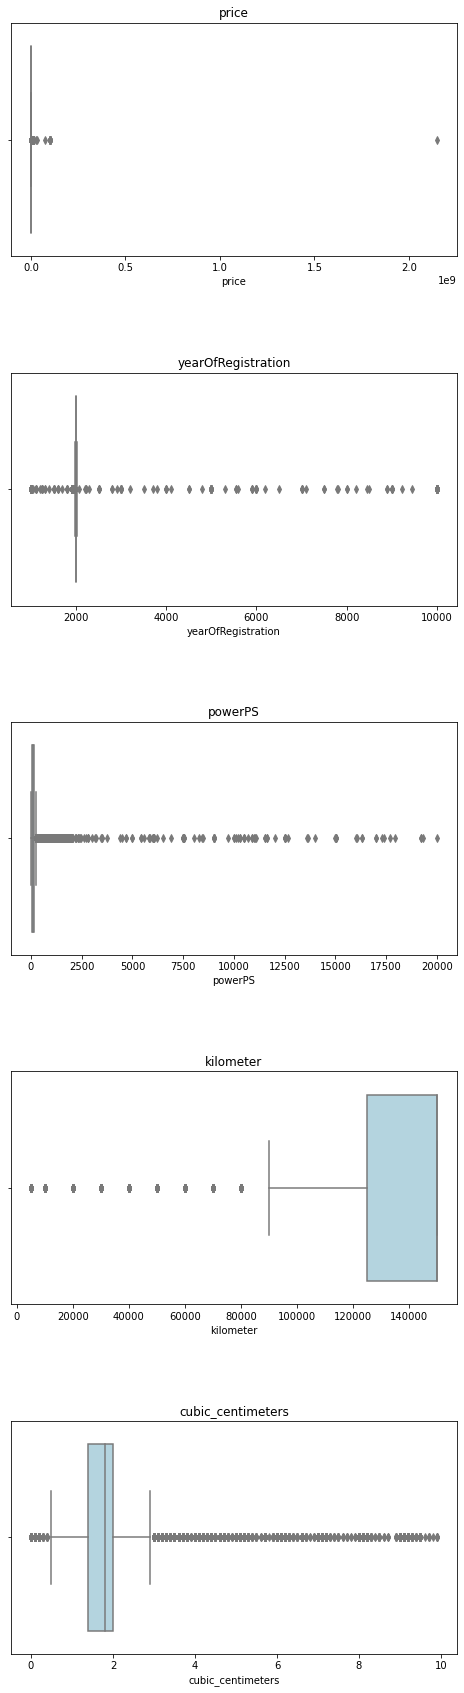

In [65]:
cols_num = ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'cubic_centimeters']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i], color='lightblue')
    ax[i].set_title(col)

- `price`: presencia de un valor superior a 2.000 millones de euros segido por otros valores exageradamente elevados. Vamos a eliminar aquellos registros cuyo auto tenga un precio mayor al millón de euros así como los que tengan un valor menor de 50 euros. Estos últimos no necesariamente serán errores, sin embargo, nos nos interesan en relación a los objetivos de la investigación.
- `yearOfRegistration`: se observan valores erróneos tanto en los valores superiores como inferiores. Los datos con los que trabajamos son de año 2016 de manera que no vamos a aceptar valores superiores a ese año. Por el lado inferior estableceremos el límite en 1950.
- `powerPS`: eliminaremos todos los registros que aparecen con un valor menor a 20 caballos de fuerza así como los mayores a 1.000.
- `kilometer`: no se observan valores extremos como tal.
- `cubic_centimeters`: existen valores de 0.0 así como valores muy altos debido a errores cuando creamos la variable. En este caso los vamos a sustituir por valores perdidos (np.nan) y en la siguiente fase decidiremos como  operar con ellos.

In [66]:
# Eliminar filas con "price" > 1.000.000 y "price" < 50
before_drop = df.shape[0]
df = df[(df['price'] < 1000000)]
df = df[(df['price'] > 50)]
after_drop = df.shape[0]
print(f'Registros eliminados: {before_drop - after_drop}')

Registros eliminados: 12463


In [67]:
# Eliminar filas con "yearOfRegistration" > 2016 y "yearOfRegistration" < 1950
before_drop = df.shape[0]
df = df[(df['yearOfRegistration']<=2016)]
df = df[(df['yearOfRegistration']>1950)]
after_drop = df.shape[0]
print(f'Registros eliminados: {before_drop - after_drop}')

Registros eliminados: 13859


In [68]:
# Eliminar filas con "powerPS" > 1.000 y "powerPS" < 20
before_drop = df.shape[0]
df = df[(df['powerPS']<1000)]
df = df[(df['powerPS']>20)]
after_drop = df.shape[0]
print(f'Registros eliminados: {before_drop - after_drop}')

Registros eliminados: 32207


In [69]:
# Transformar las filas con "cubic_centimeters" > 7.0 y "cubic_centimeters" = 0.0 en np.nan
before_trans = df['cubic_centimeters'].isna().sum()
df.loc[df['cubic_centimeters']>7.0, 'cubic_centimeters'] = np.nan
df.loc[df['cubic_centimeters']==0.0, 'cubic_centimeters'] = np.nan
after_trans = df['cubic_centimeters'].isna().sum()
print(f'Registros transformados: {after_trans - before_trans}')

Registros transformados: 943


## Resultados

In [70]:
# Dimensiones del dataframe original
df_original.shape

(371528, 21)

In [71]:
# Dimensiones del dataframe procesado
df.shape

(305762, 13)

In [72]:
print('Datos perdidos o desconocidos en el dataframe original')
aux.datos_nulos_analisis(df_original.drop(columns=['index', 'dateCrawled', 'abtest', 'monthOfRegistration', 'dateCreated', 'nrOfPictures', 'lastSeen', 'seller', 'offerType']).replace(['andere', 'sonstige_autos'], np.nan))

Datos perdidos o desconocidos en el dataframe original


,variable,cantidades,porcentajes
10,notRepairedDamage,72060.0,0.193956
6,model,46884.0,0.126192
2,vehicleType,41226.0,0.110963
8,fuelType,33594.0,0.090421
4,gearbox,20209.0,0.054394
9,brand,3982.0,0.010718
0,name,0.0,0.000000
1,price,0.0,0.000000
3,yearOfRegistration,0.0,0.000000
5,powerPS,0.0,0.000000


In [73]:
print('Datos perdidos o desconocidos en el dataframe resultante')
aux.datos_nulos_analisis(df.replace(['andere', 'sonstige_autos'], np.nan))

Datos perdidos o desconocidos en el dataframe resultante


,variable,cantidades,porcentajes
11,cubic_centimeters,181281.0,0.592883
10,notRepairedDamage,42487.0,0.138954
6,model,18886.0,0.061767
8,fuelType,15544.0,0.050837
2,vehicleType,13294.0,0.043478
4,gearbox,5351.0,0.017501
9,brand,554.0,0.001812
0,name,0.0,0.000000
1,price,0.0,0.000000
3,yearOfRegistration,0.0,0.000000


- El número de columnas se redujo de 21 a 13 después de la eliminación de las no relevantes y la creación de nuevas variables. 

- El número de observaciones disminuyó de 371528 a 305762 después de la eliminación de las filas con datos erroneos. No se eliminaron datos perdidos a falta de su procesamiento definitivo que se llevará a cabo después se su análisis en la siguiente fase de análisis exploratorio.

- Sin embargo, el número de datos perdidos o datos clasificados como 'andere' (otro) si fue reducido, como se puede ver a continuación, para las variables `brand` y `model` como resultado de la recuperación de datos. 
    - `brand` pasó de un 1% a un 0.2% de datos perdidos perteneciendo muchos de los cuales a marcas nuevas no registradas anteriormente en el dataset
    - `model`pasó de un 12.6% a un 6%
    - El resto de variables también redujeron el porcentaje de datos perdidos

- La nueva variable creada `cubic_centimeters` tiene un 59% de datos nulos.

## Exportación del dataset

In [74]:
df.to_csv('df_stage_1.csv', index = False)